# Intro to EDA & Simple ML models

# Libraries

In [2]:
# Load libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# loading data

Dataset chosen for HW1 is the Uber/Lyft price dataset available on Kaggle: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices
This dataset is price data collected from the Lyft & Uber APIs in Boston in Nov-Dec 2018.

In [50]:
# Load dataset
filename = 'cab_rides.csv'
dataset = pd.read_csv(filename)
dataset.head(3)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft


# Basic Descriptive Statistics

In [12]:
# Descriptive Statistics
dataset.shape

(693071, 10)

In [14]:
dataset.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [13]:
# description
dataset.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [15]:

dataset.groupby('cab_type').size()
#dataset.groupby('IntersectionId').size()

cab_type
Lyft    307408
Uber    385663
dtype: int64

In [16]:
dataset.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

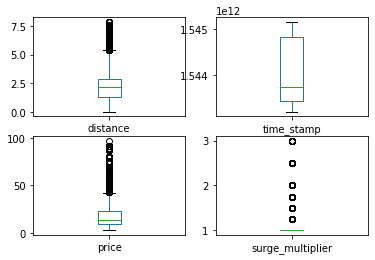

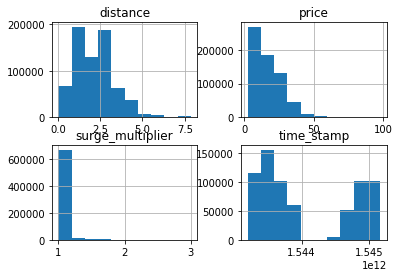

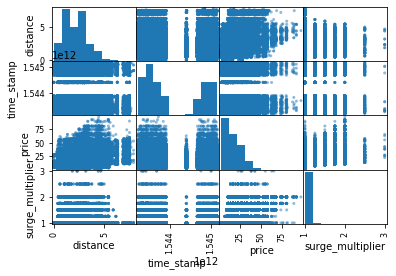

In [8]:
# Data visualizations

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()


# Data Processing & Preliminary Analysis

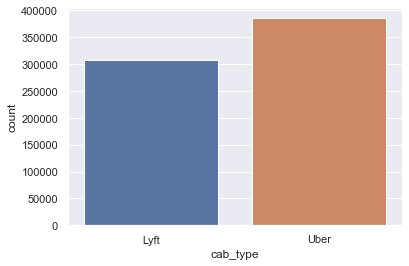

In [20]:
# Changing to categorical variables
ride_provider = ['Uber','Lyft']
dataset.cab_type.astype("category")

sns.set()
sns.countplot(dataset['cab_type'])

In [12]:
dataset.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [13]:
dataset.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

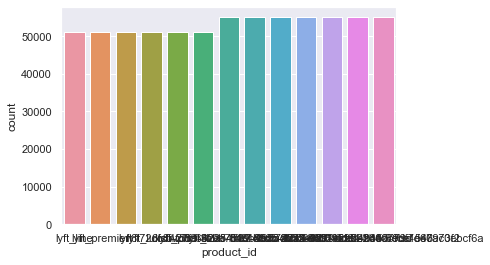

In [18]:
# Plotting frequency of 'product_id' 
sns.set()
sns.countplot(dataset['product_id'])


In [17]:
#Frequency of types of rides ('name')
dataset.name.value_counts()

WAV             55096
Black SUV       55096
UberXL          55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux Black       51235
Lux Black XL    51235
Lux             51235
Lyft XL         51235
Lyft            51235
Shared          51233
Name: name, dtype: int64

It appears that, since the data was collected from API, the data was equally sampled in each category of ride (Lyft/Uber and also Shared, Regular, Luxury, etc.). It appears this data is a 'balanced' dataset

In [51]:
# Converting time stamp to DataTime format

dataset['time_source'] = np.nan
dataset['time_source'] = pd.to_datetime(dataset['time_stamp'],unit='ms')

In [52]:
dataset.tail(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time_source
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.534
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.534
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-01 23:53:05.534


In [45]:
dataset['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

Again, similar to the type/class of ride, the dataset is balanced with respect to source & destination.

In [84]:
# Separating out lyft & Uber as the naming of rides is different in each ride provider

df_lyft = dataset[dataset['cab_type']=='Lyft']
df_uber = dataset[dataset['cab_type']=='Uber']
lyft_type = pd.CategoricalDtype(categories=['Shared', 'Lyft', 'Lyft XL','Lux', 'Lux Black','Lux Black XL'],
                             ordered=True)
#del df_lyft['time_stamp']
del df_lyft['id']
del df_lyft['product_id']

df_lyft.head(2)



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,time_source
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677


In [12]:
# Dummy variables for type of ride service

dummy_lyft = pd.get_dummies(df_lyft['name'], dtype=int)
dummy_lyft.head(3)


,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0


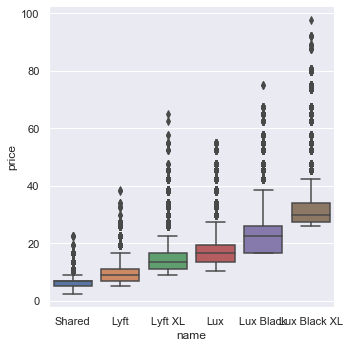

In [14]:
sns.set()
sns.catplot(y='price',x='name',kind='box',data=df_lyft, 
            order=['Shared', 'Lyft', 'Lyft XL','Lux', 'Lux Black','Lux Black XL'])

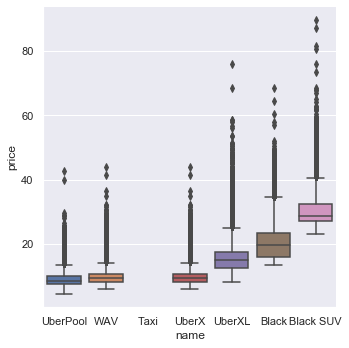

In [16]:
sns.catplot(y='price',x='name',kind='box',data=df_uber, 
            order=['UberPool','WAV','Taxi','UberX', 'UberXL', 'Black', 'Black SUV'])


It appears that there is a correlation between the type of service and price, which is expected.
Lyft - ['Shared', 'Lyft', 'Lyft XL','Lux', 'Lux Black','Lux Black XL'] in that order
Uber - ['UberPool','WAV','UberX', 'UberXL', 'Black', 'Black SUV'] in that order

In [85]:
df_lyft_dum = pd.concat([df_lyft,dummy_lyft],axis=1)

In [88]:
df_lyft_dum.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,time_source,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890,0,0,0,0,0,1
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677,1,0,0,0,0,0


In [95]:
# Creating dummy variables for peak time & week day

#df_lyft_dum['peak_time']= 1 if ((df_lyft_dum['time_source'].dt.hour > 15) & 
#                (df_lyft_dum['time_source'].dt.hour < 21)) else 0 
df_lyft_dum['peak_time']= 0 
df_lyft_dum.loc[(df_lyft_dum['time_source'].dt.hour > 5) & 
                (df_lyft_dum['time_source'].dt.hour < 11),'peak_time']= 1
df_lyft_dum.loc[(df_lyft_dum['time_source'].dt.hour > 15) & 
                (df_lyft_dum['time_source'].dt.hour < 21),'peak_time']= 1

df_lyft_dum['wkday'] = 1
df_lyft_dum.loc[(df_lyft_dum['time_source'].dt.weekday < 1) & 
                (df_lyft_dum['time_source'].dt.weekday > 5),'peak_time']= 0

df_lyft_dum.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,time_source,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,peak_time,wkday
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890,0,0,0,0,0,1,1,1
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677,1,0,0,0,0,0,0,1
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28 01:00:22.198,0,0,0,1,0,0,0,1


In [97]:
df_lyft_dum.corr()

,distance,time_stamp,price,surge_multiplier,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,peak_time,wkday
distance,1.000000,0.004085,0.361567,0.040076,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,0.000015,0.000216,NaN
time_stamp,0.004085,1.000000,0.001909,0.001093,-0.001895,0.000967,0.000371,-0.001550,0.000550,0.001557,0.024260,NaN
price,0.361567,0.001909,1.000000,0.308237,0.018740,0.254920,0.668322,-0.345506,-0.091148,-0.505335,-0.001722,NaN
surge_multiplier,0.040076,0.001093,0.308237,1.000000,0.019478,0.019478,0.019478,0.022343,0.022343,-0.103121,-0.005464,NaN
Lux,-0.000003,-0.001895,0.018740,0.019478,1.000000,-0.200002,-0.200002,-0.200002,-0.200002,-0.199997,0.000643,NaN
Lux Black,-0.000003,0.000967,0.254920,0.019478,-0.200002,1.000000,-0.200002,-0.200002,-0.200002,-0.199997,-0.000583,NaN
Lux Black XL,-0.000003,0.000371,0.668322,0.019478,-0.200002,-0.200002,1.000000,-0.200002,-0.200002,-0.199997,-0.000441,NaN
Lyft,-0.000003,-0.001550,-0.345506,0.022343,-0.200002,-0.200002,-0.200002,1.000000,-0.200002,-0.199997,-0.001650,NaN
Lyft XL,-0.000003,0.000550,-0.091148,0.022343,-0.200002,-0.200002,-0.200002,-0.200002,1.000000,-0.199997,0.000057,NaN
Shared,0.000015,0.001557,-0.505335,-0.103121,-0.199997,-0.199997,-0.199997,-0.199997,-0.199997,1.000000,0.001973,NaN


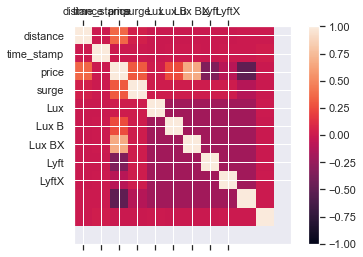

In [101]:
# Correlation Matrix plot

num_cols = ['distance','time_stamp','price','surge','Lux','Lux B','Lux BX','Lyft','LyftX','Share','peak']
correlations = df_lyft_dum.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_cols)
ax.set_yticklabels(num_cols)
pyplot.show()

In [104]:
df_lyft_dum.iloc[0,0]

0.44

In [110]:
from sklearn.model_selection import train_test_split

# Split-out validation dataset
array = df_lyft_dum.values
X = array[:,[0,6,9,10,11,12,13,14]] # 1 7:15
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


A linear regression model will be fitted to predict the price of Lyft ride given the inputs:
distance, surge multiplier, type of ride, peak time of day & weekday

In [112]:
# Fitting linear regression model

reg = LinearRegression().fit(X_train, Y_train)

In [119]:
#R-squared value for the linear regression model
print("R-squared: ", reg.score(X_train, Y_train))

R-squared:  0.9362553407172183


In [118]:
# Mean squared error
price_pred = reg.predict(X_validation)
print("mean squared error: ", mean_squared_error(price_pred,Y_validation))

mean squared error:  6.272980009424639
